In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
plt.style.use('seaborn')

# Load datasets

In [12]:
six_hourly = pd.read_csv('synthetic_nigeria_grid_data_2010_may2025_6hourly_derived.csv')
daily = pd.read_csv('synthetic_nigeria_grid_data_2010_may2025_daily_derived.csv')
weekly = pd.read_csv('synthetic_nigeria_grid_data_2010_may2025_weekly_derived.csv')

# Convert Timestamp to datetime

In [13]:
for df in [six_hourly, daily, weekly]:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [14]:
numerical_cols = [
    'Voltage (V)', 'Current (A)', 'Power Consumption (kW)', 'Reactive Power (kVAR)', 
    'Power Factor', 'Grid Supply (kW)', 'Grid Frequency (Hz)', 'Generation Capacity (MW)', 
    'Temperature (°C)', 'Humidity (%)', 'Transformer Fault', 'Line Trip Events', 
    'Overload Condition', 'Grid Collapse Events'
]

# 1. Barplot: Transformer Fault vs Grid Collapse

In [51]:
def plot_transformer_fault_vs_collapse(df, name):
    plt.figure(figsize=(6, 4))
    sns.barplot(x='Transformer Fault', y='Grid Collapse Events', data=df)
    plt.title(f'Transformer Fault vs Grid Collapse - {name.capitalize()}'),
    # plt.savefig(f'{name}_transformer_fault_vs_collapse.png', dpi=300, bbox_inches='tight')

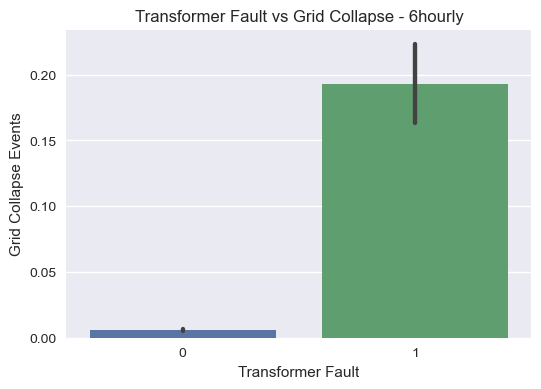

In [52]:
plot_transformer_fault_vs_collapse(six_hourly, '6hourly')

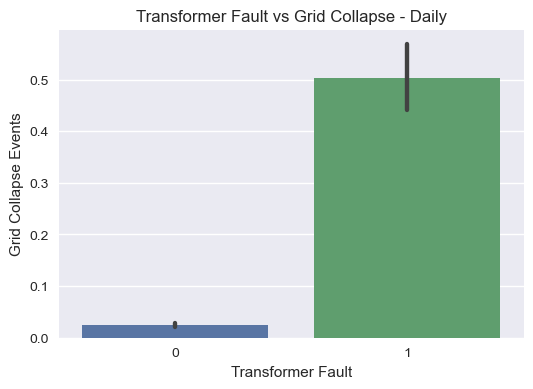

In [53]:
plot_transformer_fault_vs_collapse(daily, 'daily')

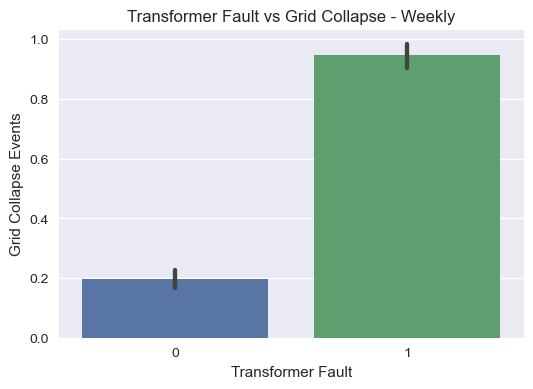

In [54]:
plot_transformer_fault_vs_collapse(weekly, 'weekly')

# 2. Scatter Plot: Voltage vs. Power Consumption

In [24]:
def plot_voltage_vs_power(df, name):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Voltage (V)', y='Power Consumption (kW)', hue='Grid Collapse Events', data=df)
    plt.title(f'Voltage vs. Power Consumption by Collapse - {name.capitalize()}'),
    # plt.savefig(f'{name}_voltage_vs_power_scatter.png', dpi=300, bbox_inches='tight')

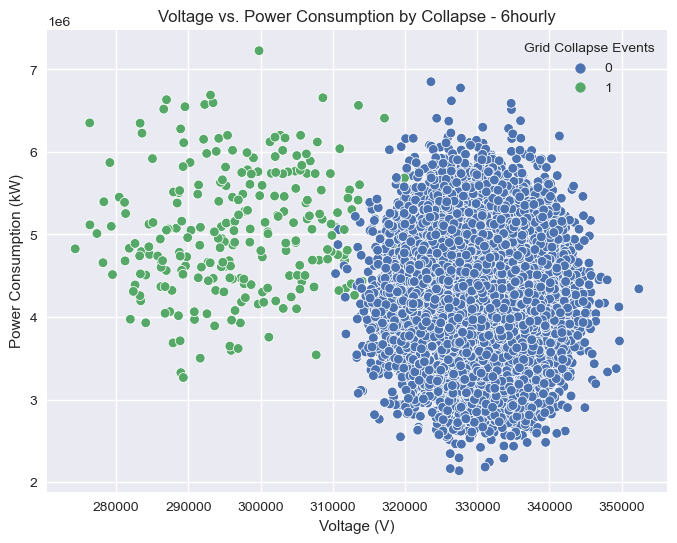

In [25]:
plot_voltage_vs_power(six_hourly, '6hourly')

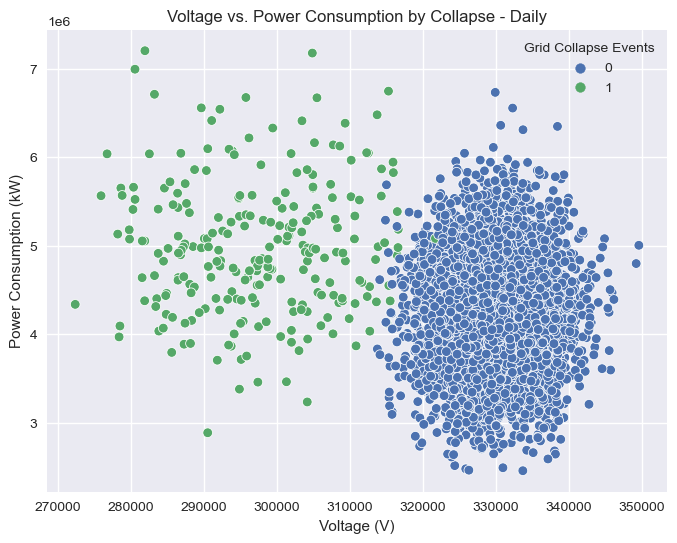

In [26]:
plot_voltage_vs_power(daily, 'daily')

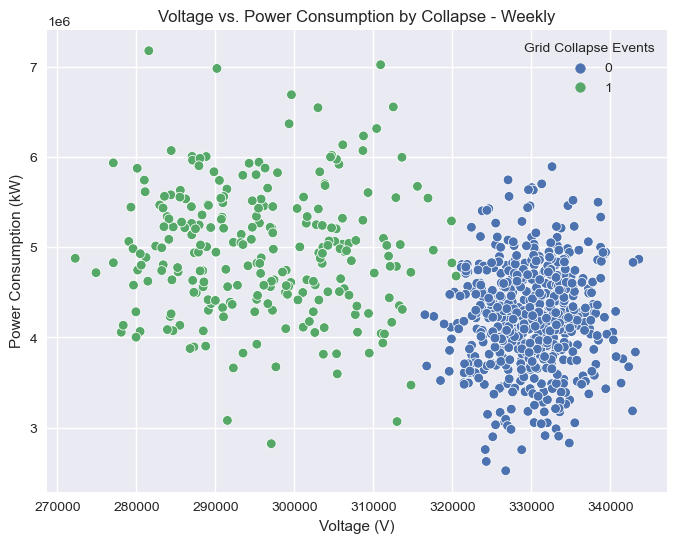

In [28]:
plot_voltage_vs_power(weekly, 'weekly')

In [ ]:
# 3. Box Plots for Electrical Parameters

In [29]:
def plot_electrical_boxplots(df, name):
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(['Voltage (V)', 'Power Consumption (kW)', 'Current (A)', 'Reactive Power (kVAR)']):
        plt.subplot(2, 2, i + 1)
        sns.boxplot(x='Grid Collapse Events', y=col, data=df)
        plt.title(f'{col} by Collapse - {name.capitalize()}')
    plt.tight_layout(),
    # plt.savefig(f'{name}_boxplot_electrical.png', dpi=300, bbox_inches='tight')

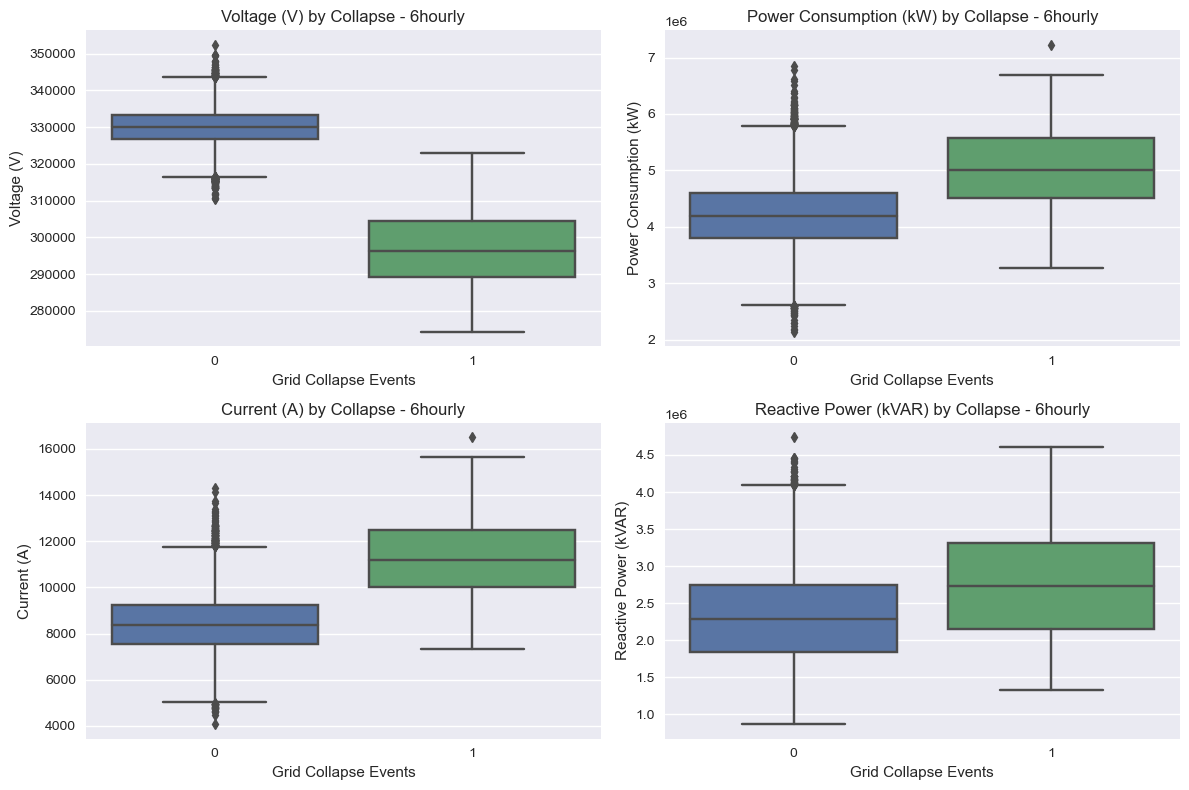

In [30]:
plot_electrical_boxplots(six_hourly, '6hourly')

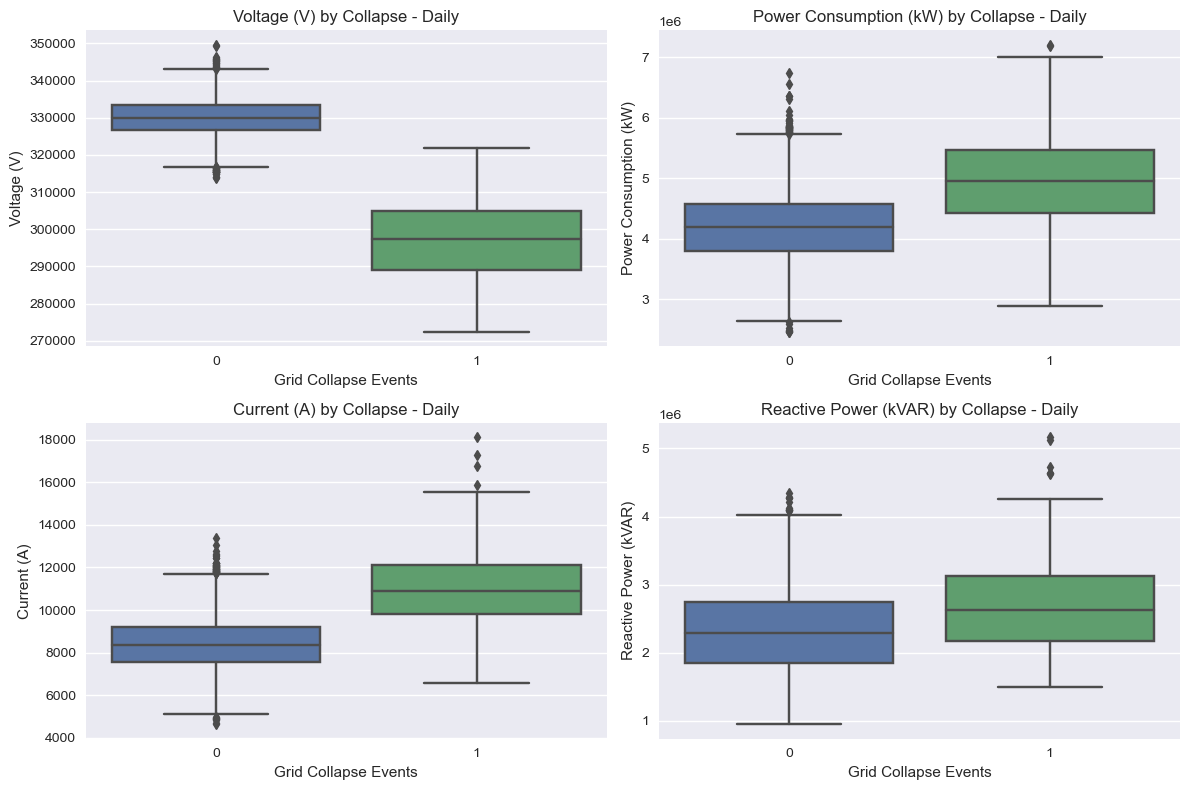

In [31]:
plot_electrical_boxplots(daily, 'daily')

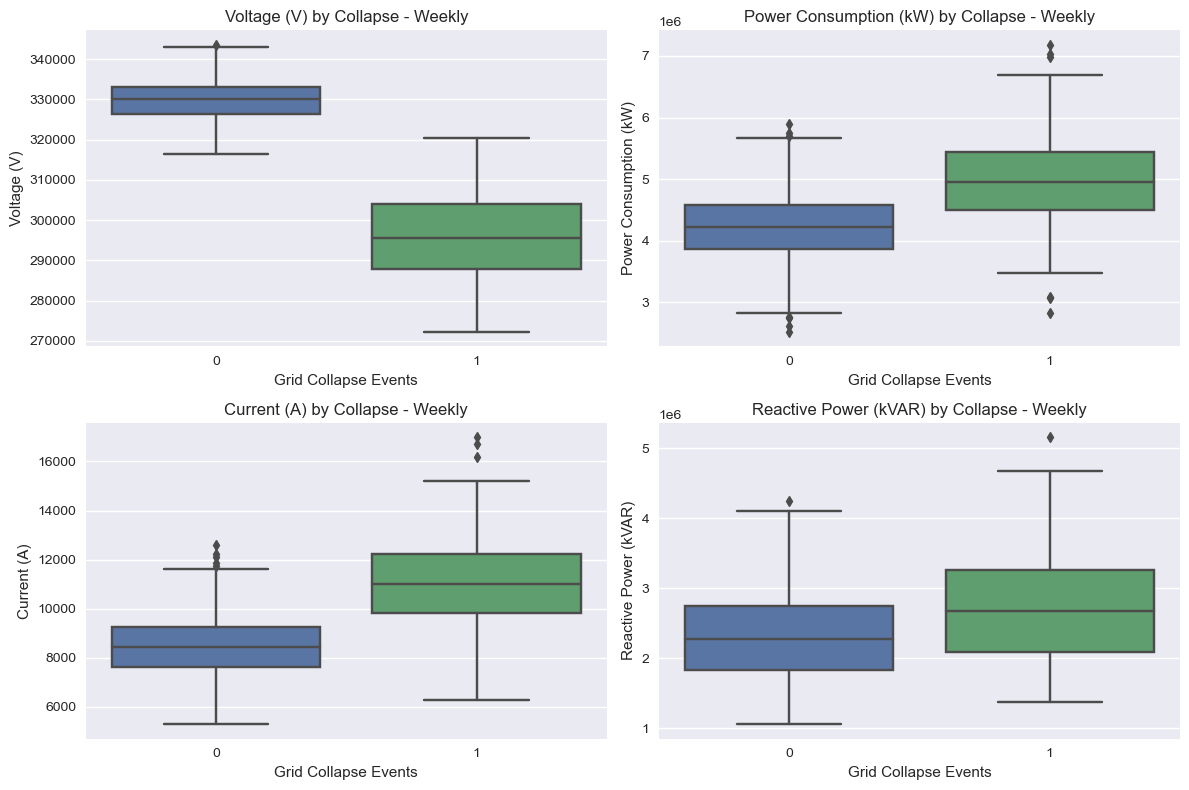

In [32]:
plot_electrical_boxplots(weekly, 'weekly')

In [33]:
# 4. Correlation Heatmap
def plot_correlation_heatmap(df, name):
    plt.figure(figsize=(10, 8))
    corr_matrix = df[numerical_cols].corr()
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
    plt.title(f'Correlation Heatmap - {name.capitalize()}'),
    # plt.savefig(f'{name}_correlation_heatmap.png', dpi=300, bbox_inches='tight')

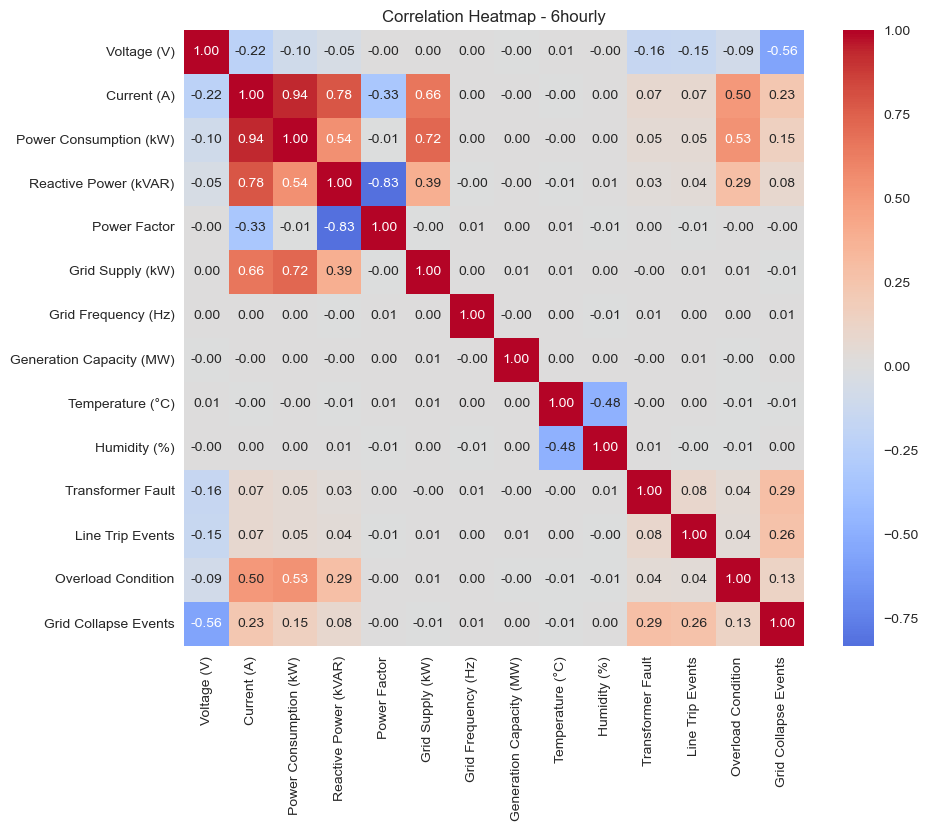

In [34]:
plot_correlation_heatmap(six_hourly, '6hourly')

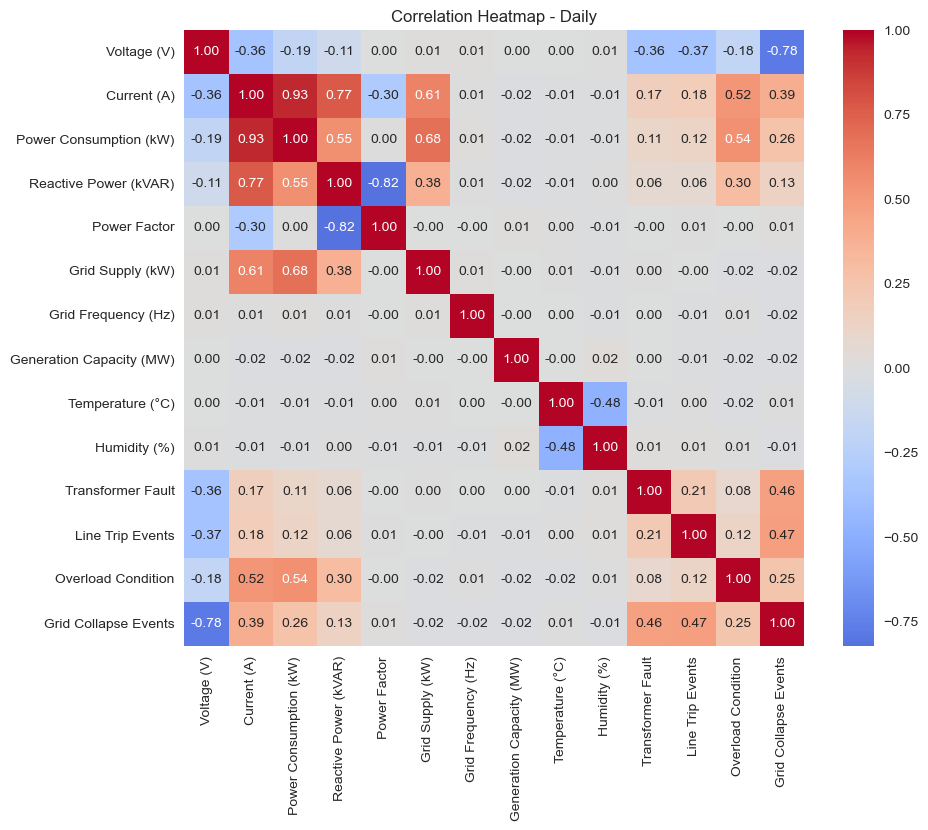

In [35]:
plot_correlation_heatmap(daily, 'daily')

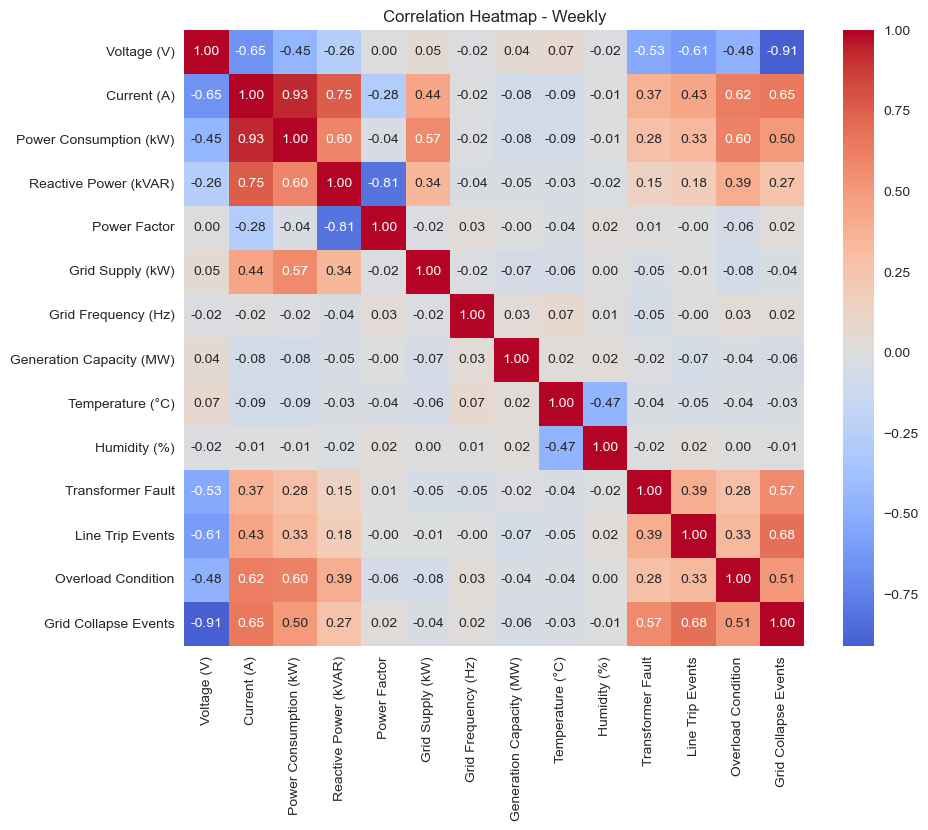

In [36]:
plot_correlation_heatmap(weekly, 'weekly')

In [37]:
# 5. Histograms of Faults
def plot_fault_histograms(df, name):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x='Line Trip Events', hue='Grid Collapse Events', multiple='stack')
    plt.title(f'Line Trip Events by Collapse - {name.capitalize()}')
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x='Overload Condition', hue='Grid Collapse Events', multiple='stack')
    plt.title(f'Overload Condition by Collapse - {name.capitalize()}')
    plt.tight_layout(),
    # plt.savefig(f'{name}_histogram_faults.png', dpi=300, bbox_inches='tight')

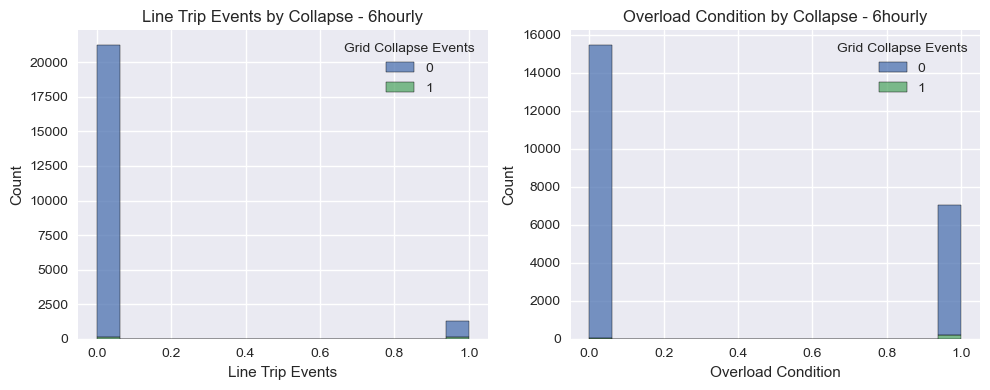

In [38]:
plot_fault_histograms(six_hourly, '6hourly')

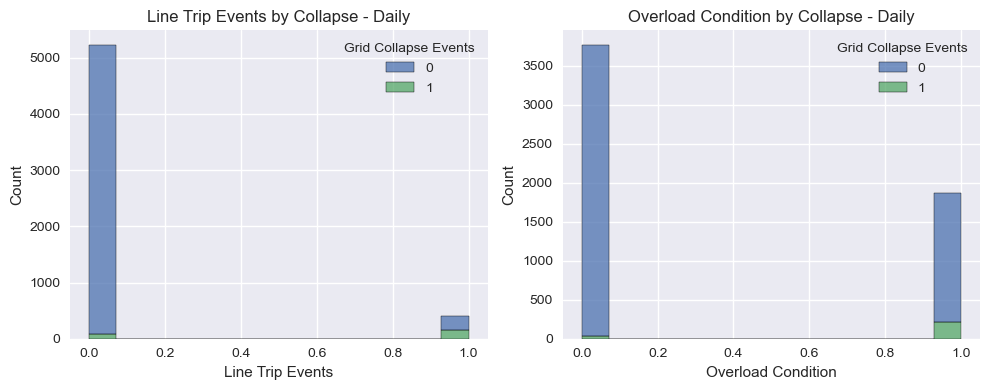

In [39]:
plot_fault_histograms(daily, 'daily')

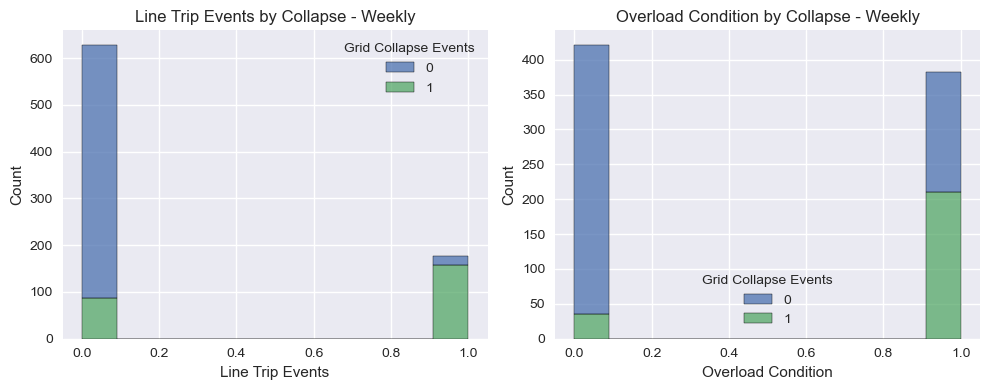

In [40]:
plot_fault_histograms(weekly, 'weekly')

In [41]:
# 6. Seasonal Bar Plot: Grid Collapses by Month
def plot_collapses_by_month(df, name):
    df['Month'] = df['Timestamp'].dt.month
    collapses_by_month = df[df['Grid Collapse Events'] == 1]['Month'].value_counts().sort_index()
    plt.figure(figsize=(8, 4))
    collapses_by_month.plot(kind='bar', color='blue')
    plt.title(f'Grid Collapses by Month - {name.capitalize()}')
    plt.xlabel('Month')
    plt.ylabel('Number of Collapses')
    plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0),
    # plt.savefig(f'{name}_collapses_by_month.png', dpi=300, bbox_inches='tight')

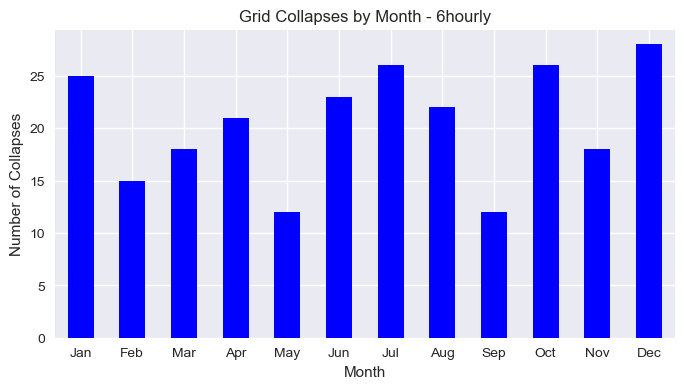

In [42]:
plot_collapses_by_month(six_hourly, '6hourly')

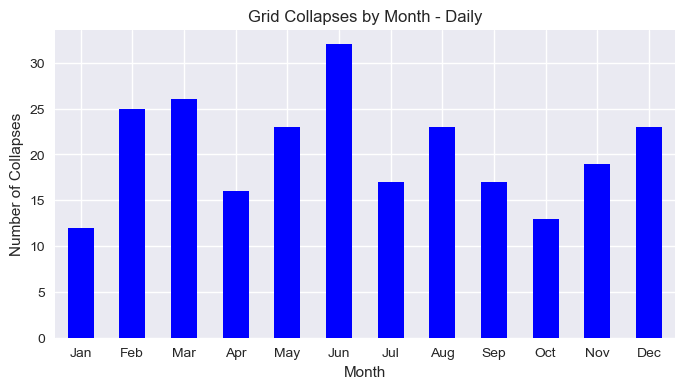

In [43]:
plot_collapses_by_month(daily, 'daily')

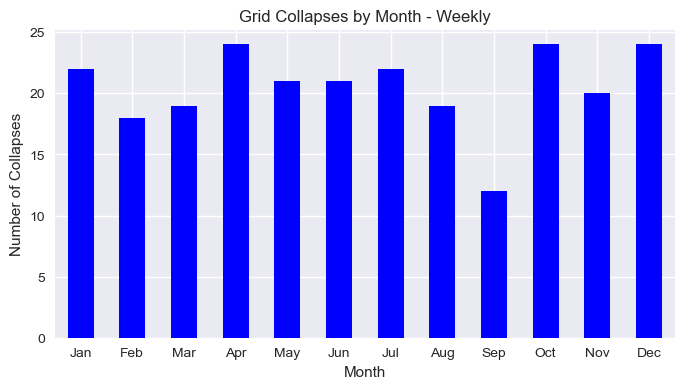

In [44]:
plot_collapses_by_month(weekly, 'weekly')

# 7. Time Series of Faults

In [46]:
def plot_faults_timeseries(df, name):
    collapses = df[df['Grid Collapse Events'] == 1]
    plt.figure(figsize=(10, 6))
    
    plt.subplot(2, 1, 1)
    plt.plot(df['Timestamp'], df['Line Trip Events'], label='Line Trip Events', color='orange', alpha=0.5)
    plt.scatter(collapses['Timestamp'], collapses['Line Trip Events'], color='red', s=50, label='During Collapses')
    plt.title(f'Line Trip Events Over Time - {name.capitalize()}')
    plt.xlabel('Year')
    plt.ylabel('Line Trip Events')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(df['Timestamp'], df['Overload Condition'], label='Overload Condition', color='purple', alpha=0.5)
    plt.scatter(collapses['Timestamp'], collapses['Overload Condition'], color='red', s=50, label='During Collapses')
    plt.title(f'Overload Condition Over Time - {name.capitalize()}')
    plt.xlabel('Year')
    plt.ylabel('Overload Condition')
    plt.legend()

    plt.tight_layout(),
    # plt.savefig(f'{name}_faults_timeseries.png', dpi=300, bbox_inches='tight')

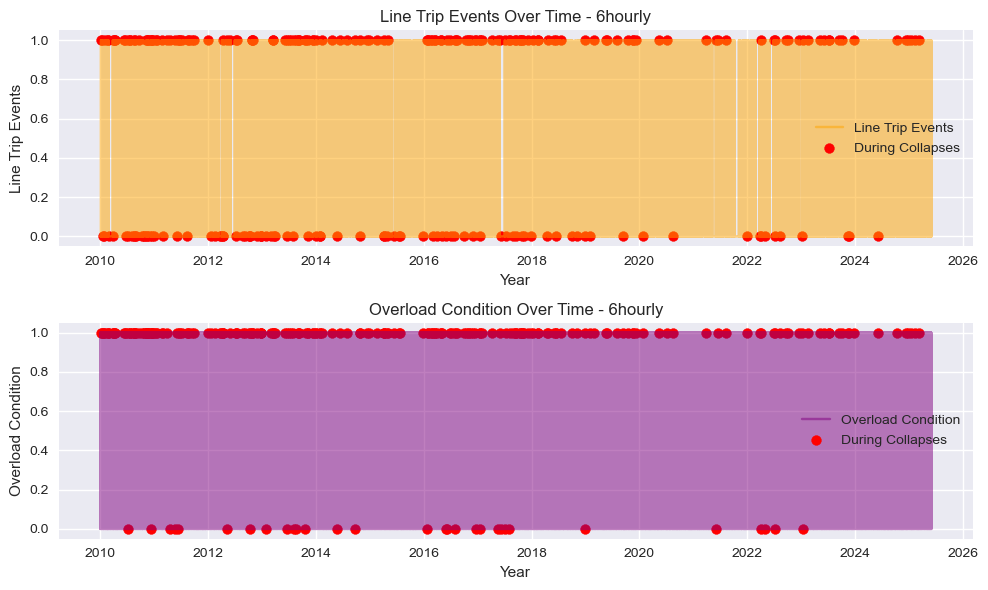

In [47]:
plot_faults_timeseries(six_hourly, '6hourly')

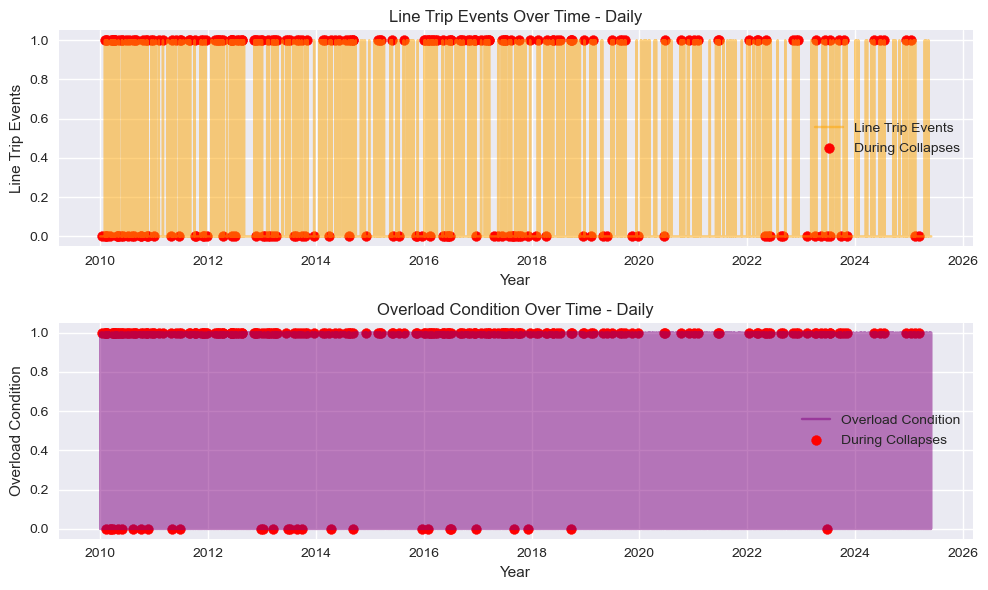

In [48]:
plot_faults_timeseries(daily, 'daily')

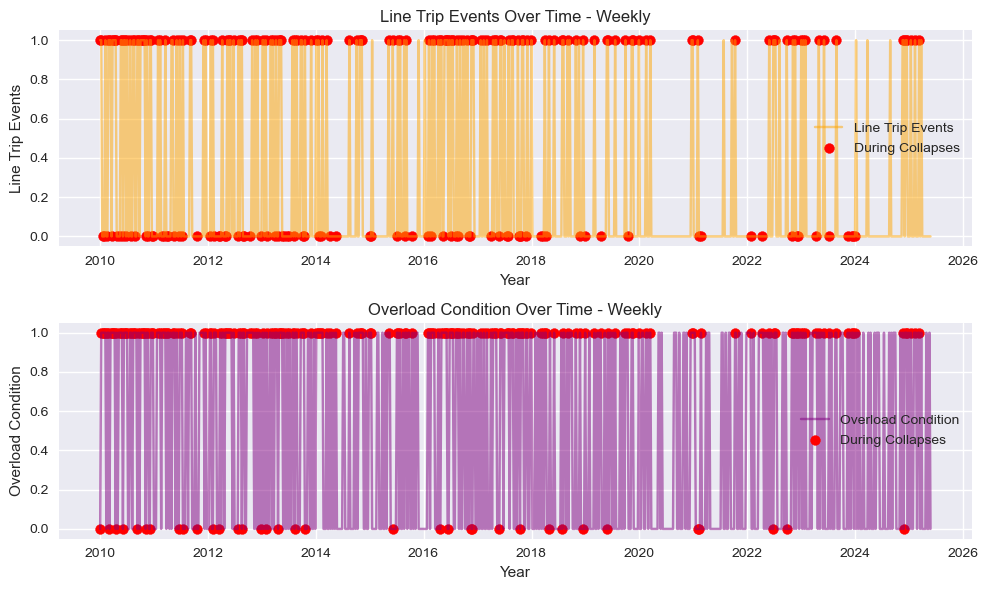

In [49]:
plot_faults_timeseries(weekly, 'weekly')

# 8. Weekday vs Weekend Collapse

In [55]:
def plot_weekday_vs_weekend(df, name):
    df['IsWeekend'] = df['Timestamp'].dt.dayofweek >= 5
    result = df.groupby('IsWeekend')['Grid Collapse Events'].sum().reset_index()
    plt.figure(figsize=(5, 4))
    sns.barplot(x='IsWeekend', y='Grid Collapse Events', data=result)
    plt.title(f'Grid Collapses: Weekday vs Weekend - {name.capitalize()}')
    plt.xticks([0, 1], ['Weekday', 'Weekend']),
    # plt.savefig(f'{name}_weekday_vs_weekend.png', dpi=300, bbox_inches='tight')

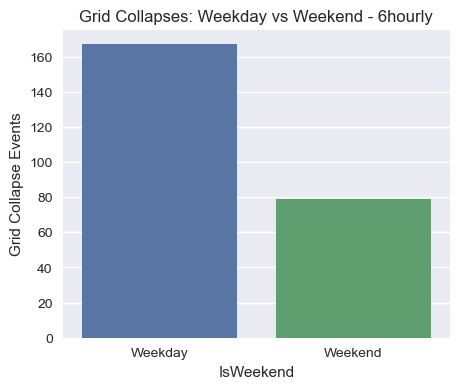

In [58]:
plot_weekday_vs_weekend(six_hourly, '6hourly')

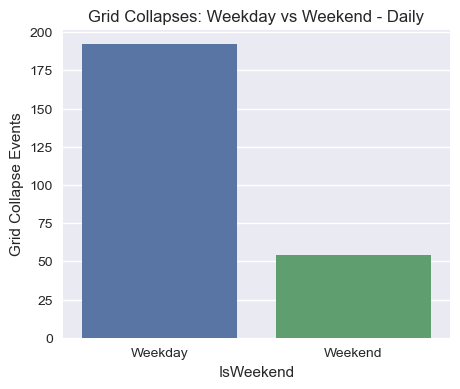

In [56]:
plot_weekday_vs_weekend(daily, 'daily')

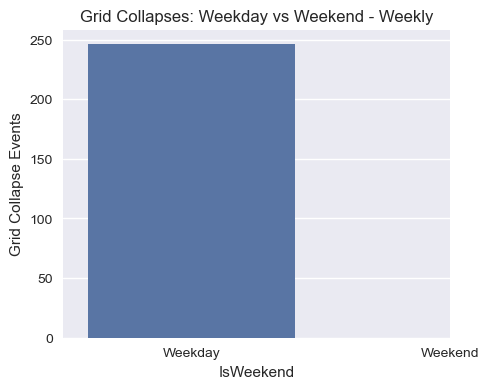

In [57]:
plot_weekday_vs_weekend(weekly, 'weekly')

In [59]:
# 9. Temperature Comparison
def plot_temperature_by_collapse(df, name):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Grid Collapse Events', y='Temperature (°C)', data=df)
    plt.title(f'Temperature vs Collapse - {name.capitalize()}'),
    # plt.savefig(f'{name}_temperature_by_collapse.png', dpi=300, bbox_inches='tight')

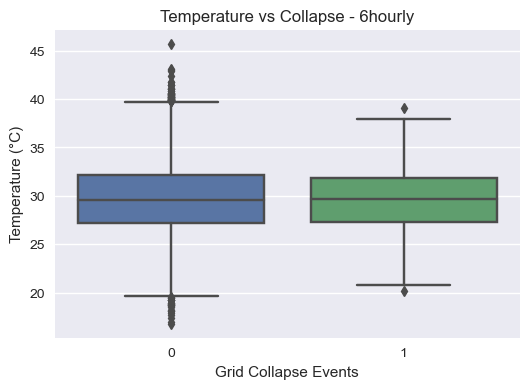

In [60]:
plot_temperature_by_collapse(six_hourly, '6hourly')

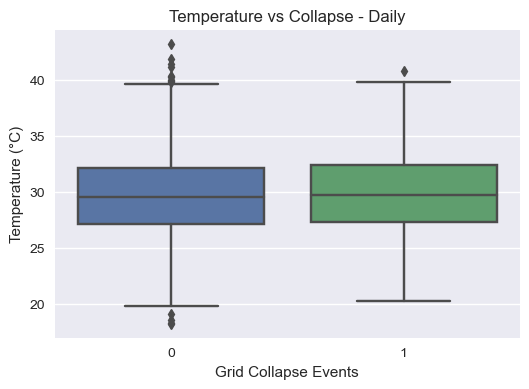

In [61]:
plot_temperature_by_collapse(daily, 'daily')

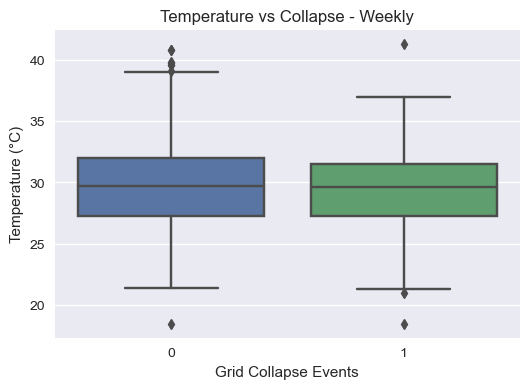

In [62]:
plot_temperature_by_collapse(weekly, 'weekly')

In [63]:
# 10. Humidity Comparison
def plot_humidity_by_collapse(df, name):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Grid Collapse Events', y='Humidity (%)', data=df)
    plt.title(f'Humidity vs Collapse - {name.capitalize()}'),
    # plt.savefig(f'{name}_humidity_by_collapse.png', dpi=300, bbox_inches='tight')

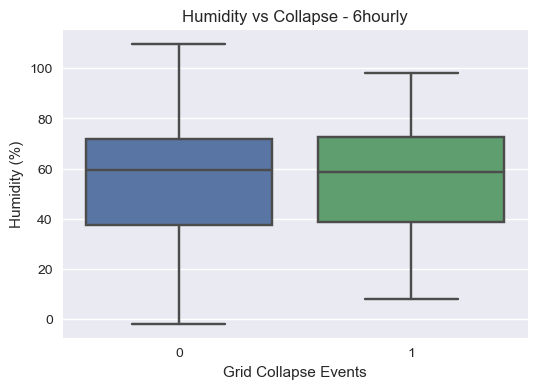

In [64]:
plot_humidity_by_collapse(six_hourly, '6hourly')

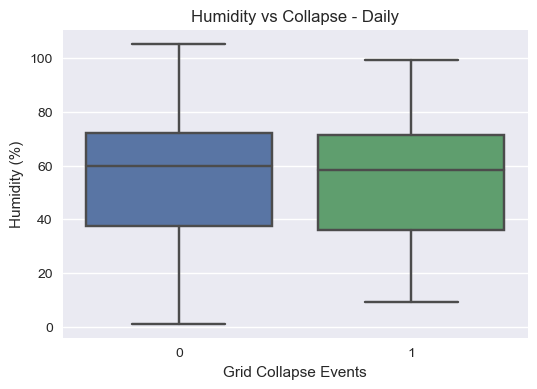

In [65]:
plot_humidity_by_collapse(daily, 'daily')

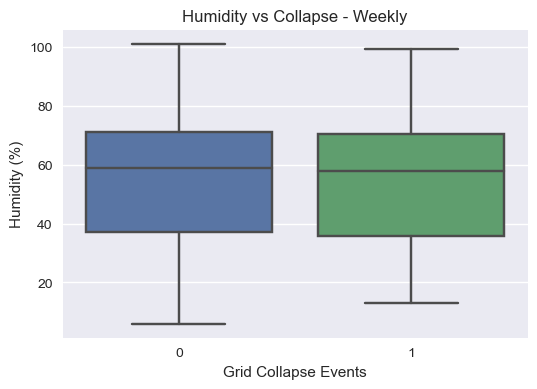

In [66]:
plot_humidity_by_collapse(weekly, 'weekly')

# A function that downloads the insghts

In [67]:
def process_dataset(df, name):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

    # 1. Transformer Fault vs Grid Collapse
    plt.figure(figsize=(6, 4))
    sns.barplot(x='Transformer Fault', y='Grid Collapse Events', data=df)
    plt.title(f'Transformer Fault vs Grid Collapse - {name.capitalize()}')
    plt.savefig(f'{name}_transformer_fault_vs_collapse.png', dpi=300, bbox_inches='tight')
    plt.close()

    # 2. Voltage vs Power Consumption
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Voltage (V)', y='Power Consumption (kW)', hue='Grid Collapse Events', data=df)
    plt.title(f'Voltage vs. Power Consumption by Collapse - {name.capitalize()}')
    plt.savefig(f'{name}_voltage_vs_power_scatter.png', dpi=300, bbox_inches='tight')
    plt.close()

    # 3. Boxplots of Electrical Params
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(['Voltage (V)', 'Power Consumption (kW)', 'Current (A)', 'Reactive Power (kVAR)']):
        plt.subplot(2, 2, i + 1)
        sns.boxplot(x='Grid Collapse Events', y=col, data=df)
        plt.title(f'{col} by Collapse - {name.capitalize()}')
    plt.tight_layout()
    plt.savefig(f'{name}_boxplot_electrical.png', dpi=300, bbox_inches='tight')
    plt.close()

    # 4. Correlation Heatmap
    plt.figure(figsize=(10, 8))
    corr_matrix = df[numerical_cols].corr()
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
    plt.title(f'Correlation Heatmap - {name.capitalize()}')
    plt.savefig(f'{name}_correlation_heatmap.png', dpi=300, bbox_inches='tight')
    plt.close()

    # 5. Histograms of Line Trip and Overload
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x='Line Trip Events', hue='Grid Collapse Events', multiple='stack')
    plt.title(f'Line Trip Events by Collapse - {name.capitalize()}')
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x='Overload Condition', hue='Grid Collapse Events', multiple='stack')
    plt.title(f'Overload Condition by Collapse - {name.capitalize()}')
    plt.tight_layout()
    plt.savefig(f'{name}_histogram_faults.png', dpi=300, bbox_inches='tight')
    plt.close()

    # 6. Collapses by Month
    df['Month'] = df['Timestamp'].dt.month
    collapses_by_month = df[df['Grid Collapse Events'] == 1]['Month'].value_counts().sort_index()
    plt.figure(figsize=(8, 4))
    collapses_by_month.plot(kind='bar', color='blue')
    plt.title(f'Grid Collapses by Month - {name.capitalize()}')
    plt.xlabel('Month')
    plt.ylabel('Number of Collapses')
    plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
    plt.savefig(f'{name}_collapses_by_month.png', dpi=300, bbox_inches='tight')
    plt.close()

    # 7. Time Series of Faults
    collapses = df[df['Grid Collapse Events'] == 1]
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(df['Timestamp'], df['Line Trip Events'], label='Line Trip Events', color='orange', alpha=0.5)
    plt.scatter(collapses['Timestamp'], collapses['Line Trip Events'], color='red', s=50, label='During Collapses')
    plt.title(f'Line Trip Events Over Time - {name.capitalize()}')
    plt.xlabel('Year')
    plt.ylabel('Line Trip Events')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(df['Timestamp'], df['Overload Condition'], label='Overload Condition', color='purple', alpha=0.5)
    plt.scatter(collapses['Timestamp'], collapses['Overload Condition'], color='red', s=50, label='During Collapses')
    plt.title(f'Overload Condition Over Time - {name.capitalize()}')
    plt.xlabel('Year')
    plt.ylabel('Overload Condition')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{name}_faults_timeseries.png', dpi=300, bbox_inches='tight')
    plt.close()

    # 8. Weekday vs Weekend
    df['IsWeekend'] = df['Timestamp'].dt.dayofweek >= 5
    result = df.groupby('IsWeekend')['Grid Collapse Events'].sum().reset_index()
    plt.figure(figsize=(5, 4))
    sns.barplot(x='IsWeekend', y='Grid Collapse Events', data=result)
    plt.title(f'Grid Collapses: Weekday vs Weekend - {name.capitalize()}')
    plt.xticks([0, 1], ['Weekday', 'Weekend'])
    plt.savefig(f'{name}_weekday_vs_weekend.png', dpi=300, bbox_inches='tight')
    plt.close()

    # 9. Temperature Comparison
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Grid Collapse Events', y='Temperature (°C)', data=df)
    plt.title(f'Temperature vs Collapse - {name.capitalize()}')
    plt.savefig(f'{name}_temperature_by_collapse.png', dpi=300, bbox_inches='tight')
    plt.close()

    # 10. Humidity Comparison
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Grid Collapse Events', y='Humidity (%)', data=df)
    plt.title(f'Humidity vs Collapse - {name.capitalize()}')
    plt.savefig(f'{name}_humidity_by_collapse.png', dpi=300, bbox_inches='tight')
    plt.close()

In [68]:
process_dataset(daily, 'daily')
print("All plots generated and saved.")

All plots generated and saved.


In [71]:
daily

,Timestamp,Voltage (V),Power Factor,Grid Supply (kW),Grid Frequency (Hz),Generation Capacity (MW),Power Consumption (kW),Current (A),Reactive Power (kVAR),Temperature (°C),Humidity (%),Transformer Fault,Line Trip Events,Overload Condition,Grid Collapse Events,Month,IsWeekend
0,2010-01-01,332483.57,0.942,4308020.04,49.87,5015.48,4447274.99,8199.24,1586454.64,33.1,28.5,0,0,0,0,1,False
1,2010-01-02,329308.68,0.820,4602458.90,50.15,3352.51,4419303.10,9450.10,3086000.31,29.7,26.2,0,0,0,0,1,True
2,2010-01-03,333238.44,0.916,3824460.00,50.17,4029.83,4591651.55,8682.85,2008252.36,33.1,48.3,0,0,1,0,1,True
3,2010-01-04,337615.15,0.840,3544375.40,50.12,3092.85,4391616.83,8943.47,2839887.80,27.8,32.4,0,0,1,0,1,False
4,2010-01-05,328829.23,0.940,3016732.23,49.79,3786.62,3116647.78,5821.18,1130789.14,41.8,31.5,0,0,0,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,2025-05-27,329512.37,0.882,3737369.21,49.98,4187.15,4052514.62,8051.83,2166841.57,31.4,62.5,0,0,0,0,5,False
5626,2025-05-28,331639.06,0.894,4363044.72,49.89,3946.00,4935999.93,9610.39,2471898.16,28.9,79.5,0,0,1,0,5,False
5627,2025-05-29,334762.39,0.940,3670311.02,49.74,2974.73,3253897.31,5968.23,1177900.65,32.9,73.2,0,0,0,0,5,False
5628,2025-05-30,325945.53,0.845,4317455.72,49.94,4653.05,3852725.77,8077.52,2439650.33,22.7,74.2,0,0,0,0,5,False


In [70]:
?